In [1]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import SeasonalAD

import joblib

import orchest

In [2]:
signal = orchest.get_inputs()["timeseries"]
validate_series(signal)

2021-08-10 12:30:00+00:00    6565.0
2021-08-10 13:30:00+00:00    7361.0
2021-08-10 14:30:00+00:00    6162.0
2021-08-10 15:30:00+00:00    6242.0
2021-08-10 16:30:00+00:00    4990.0
                              ...  
2022-08-30 01:30:00+00:00       NaN
2022-08-30 02:30:00+00:00       NaN
2022-08-30 03:30:00+00:00       NaN
2022-08-30 04:30:00+00:00    4451.0
2022-08-30 05:30:00+00:00    6913.0
Freq: H, Name: traffic, Length: 9234, dtype: float64

In [3]:
# %matplotlib ipympl

In [4]:
# plot(signal, figsize=(10, 4))

In [5]:
signal_interp = signal.interpolate("time")

# plot(signal_interp, figsize=(10, 4))

In [6]:
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(signal_interp)

[<AxesSubplot:>]

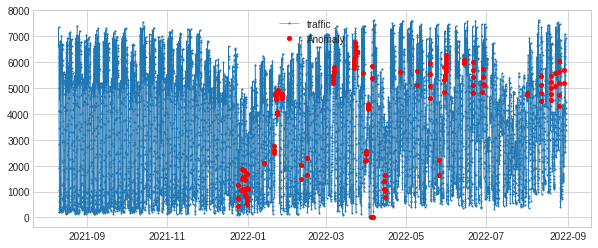

In [7]:
plot(signal_interp, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", figsize=(10, 4))

In [8]:
joblib.dump(seasonal_ad, "/data/clarify-timeseries-orchest/model.joblib")

['/data/clarify-timeseries-orchest/model.joblib']